In [4]:
%matplotlib inline

import json
from collections import defaultdict, Counter
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


raw_path = Path('/home/bnu/projects/CCKS2020-Entity-Linking/data/ccks2020_el_data_v1')
pickle_path = Path('/home/bnu/projects/CCKS2020-Entity-Linking/data/pickle')

In [2]:
entity_to_kbids = defaultdict(set)
kbid_to_entities = dict()
kbid_to_text = dict()
kbid_to_types = dict()

idx_to_type = []
type_to_idx = dict()

with open(raw_path/'kb.json', 'r') as f:
    for i, line in enumerate(f):
        temp = json.loads(line)
        
        kbid = temp['subject_id']
        entities = set(temp['alias'])
        entities.add(temp['subject'])
        for entity in entities:
            entity_to_kbids[entity].add(kbid)
        kbid_to_entities[kbid] = entities
        
        data_list = []
        for x in temp['data']:
            data_list.append(':'.join([x['predicate'], x['object']]))
        kbid_to_text[kbid] = ' '.join(data_list)
        
        type_list = temp['type'].split('|')
        kbid_to_types[kbid] = type_list
        for t in type_list:
            if t not in type_to_idx:
                type_to_idx[t] = len(idx_to_type)
                idx_to_type.append(t)        

In [8]:
pd.to_pickle(kbid_to_entities, pickle_path/'kbid_to_entities.pkl')
kbid_to_entities = pd.read_pickle(pickle_path/'kbid_to_entities.pkl')
kbid_to_entities

{'10001': {'张健'},
 '10002': {'Sacred journey', '圣途'},
 '10003': {'李明'},
 '10004': {'陈臻'},
 '10005': {'承志', '爱新觉罗·承志'},
 '10006': {'COC'},
 '10007': {'王建平'},
 '10008': {'海盗'},
 '10009': {'原型'},
 '10010': {'光'},
 '10011': {'FAIRY TAIL : HOUOU NO MIKO', '妖精的尾巴《凤凰的巫女》', '妖精的尾巴剧场版'},
 '10012': {'天梯'},
 '10013': {'李志军'},
 '10014': {'周红斌'},
 '10015': {'散户'},
 '10016': {'李潇'},
 '10017': {'李鑫'},
 '10018': {'配角'},
 '10019': {'十八'},
 '10020': {'诸葛亮'},
 '10021': {'摆渡人'},
 '10022': {'杭州市城市土地发展有限公司'},
 '10023': {'Frozen', '冷若冰霜'},
 '10024': {'徐新建'},
 '10025': {'马壮'},
 '10026': {'Longquanyi District',
  '成都龙泉',
  '成都龙泉驿',
  '成都龙泉驿区',
  '龙泉',
  '龙泉驿',
  '龙泉驿区'},
 '10027': {'工程制图习题集'},
 '10028': {'萤火虫'},
 '10029': {'Gravity', '地心引力'},
 '10030': {'三生石'},
 '10031': {'aggregate', '集', '集合'},
 '10032': {'在那东山顶上'},
 '10033': {'郝梅'},
 '10034': {'刀剑如梦'},
 '10035': {'波斯语：جلال دین محمد اکبر拉丁化：Jalal din Muhammad Akbar',
  '阿克巴',
  '阿克巴(1542～1605)',
  '阿克巴大帝',
  '阿布·乌尔法特·贾拉尔丁·穆罕默德·阿克巴'},
 '10036': {'Meerkat, Sur

In [64]:
print('知识库大小：', len(kbid_to_entities))
print('实体数量：', len(entity_to_kbids))
print('上位类型数量：', len(type_to_idx))

知识库大小： 324418
实体数量： 278668
上位类型数量： 24


In [65]:
print('包含有大量KBID的实体：')
for k, v in entity_to_kbids.items():
    if len(v) > 100:
        print(k, len(v))

包含有大量KBID的实体：
张健 181
李明 229
杨林 107
王芳 146
刘涛 120
张明 157
张华 158
张宇 111
张建军 109
刘杰 156
陈涛 122
杨帆 128
李磊 103
刘斌 171
李峰 136
刘伟 206
王建国 133
陈刚 184
张敏 161
陈军 144
王伟 259
杨军 185
张涛 188
李平 175
陈斌 103
张辉 134
李强 220
王旭 112
张杰 157
李杰 156
刘波 137
李俊 146
无 352
王勇 261
高峰 152
王磊 169
杨光 128
杨波 168
新华村 109
王强 204
李超 117
刘健 102
陈勇 187
张磊 147
张伟 279
张勇 285
王东 112
李伟 253
王毅 120
王刚 181
刘强 162
陈平 119
刘军 228
刘敏 162
李红 101
王宏 135
张平 115
张建华 150
王峰 140
张军 199
陈华 120
张帆 105
李健 134
李静 134
刘勇 223
张强 149
刘辉 124
刘超 107
王鹏 147
王敏 164
李涛 147
张浩 103
李军 274
张毅 107
李林 107
王志刚 101
刘刚 150
张颖 101
王琳 104
李建华 130
王飞 110
万达广场 130
李刚 187
张宁 124
李勇 232
李莉 143
王俊 124
王涛 147
王军 234
刘畅 108
吴刚 107
王宁 103
李华 133
王健 203
刘洋 140
刘峰 123
石磊 118
杨斌 127
王林 118
黄勇 116
王宇 104
陈明 116
陈敏 117
杨明 105
张斌 151
刘鹏 101


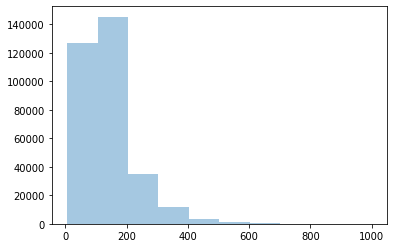

In [66]:
text_lengths = [min(1000, len(v)) for v in kbid_to_text.values()]
sns.distplot(text_lengths, kde=False, bins=10)
plt.show()